<a href="https://colab.research.google.com/github/soares-a/Formulario/blob/master/Regress%C3%A3oAbalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Nesta atividade, aplicamos técnicas de regressão linear para prever a idade do abalone (um tipo de molusco) com base em medições físicas.  
A idade real do abalone é determinada pelo número de anéis em sua casca, somando-se 1,5. Este processo tradicional é demorado, e o objetivo é criar um modelo que estime a idade a partir de variáveis mais fáceis de medir.  

### Objetivo:
Desenvolver um modelo preditivo de regressão linear para estimar a idade do abalone com precisão, avaliando seu desempenho por meio de métricas como R² e RMSE.  

### Conjunto de Dados:
O conjunto de dados contém medições físicas como comprimento, diâmetro, altura e pesos. A variável alvo é o número de anéis.  


### Extração do Arquivo ZIP

Neste passo, estamos extraindo o conteúdo do arquivo ZIP que contém o conjunto de dados. Usamos a biblioteca `zipfile` para abrir e extrair os arquivos para o diretório local especificado.


In [1]:
import zipfile
import os

# Nome do arquivo zipado
zip_file = 'abalone.zip'

# Caminho de extração
extract_path = './abalone_data'

# Extração
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar os arquivos extraídos
os.listdir(extract_path)



['abalone.data', 'Index', 'abalone.names']

### Carregando o Conjunto de Dados

Neste passo, estamos carregando o conjunto de dados extraído para um DataFrame do Pandas, que facilita a manipulação e análise dos dados. A função `read_csv` é utilizada para ler os dados do arquivo `.data`, e as colunas são nomeadas conforme a descrição fornecida.



In [2]:
import pandas as pd

# Nomes das colunas
columns = [
    "Sex", "Length", "Diameter", "Height", "Whole weight",
    "Shucked weight", "Viscera weight", "Shell weight", "Rings"
]

# Caminho do arquivo
data_path = os.path.join(extract_path, 'abalone.data')

# Carregar o DataFrame
abalone_data = pd.read_csv(data_path, header=None, names=columns)

# Exibir as primeiras linhas
abalone_data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Análise Exploratória dos Dados

Neste passo, realizamos uma análise inicial dos dados para entender suas características e verificar possíveis problemas, como valores ausentes. Além disso, exploramos a distribuição da variável-alvo (`Rings`).



            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

<Axes: xlabel='Rings'>

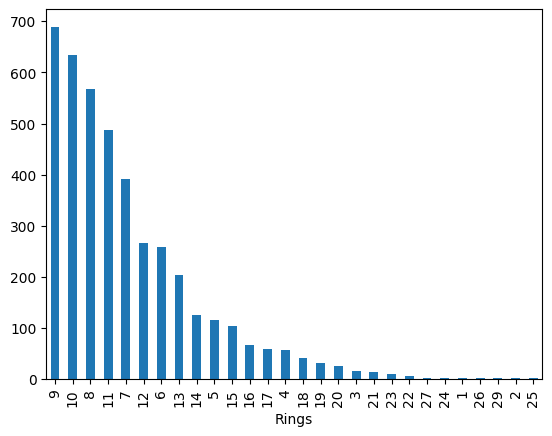

In [3]:
# Estatísticas básicas
print(abalone_data.describe())

# Verificar valores ausentes
print(abalone_data.isnull().sum())

# Distribuição da variável target (Rings)
abalone_data['Rings'].value_counts().plot(kind='bar')


### Preparação dos Dados para o Modelo

Neste passo, estamos preparando os dados para treinar e testar o modelo de regressão. Primeiramente, as variáveis preditoras (X) e a variável alvo (y) são separadas. Em seguida, dividimos os dados em conjuntos de treinamento e teste, garantindo que o modelo seja avaliado em dados não vistos durante o treinamento.


In [4]:
from sklearn.model_selection import train_test_split

# Separar variáveis preditoras e alvo
X = abalone_data.drop(columns=['Rings', 'Sex'])  # Remove Sex e Rings
y = abalone_data['Rings']

# Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Treinamento e Avaliação do Modelo

Neste passo, treinamos o modelo de regressão linear com os dados de treinamento e avaliamos o desempenho utilizando as métricas de R² e RMSE.


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R²: 0.5329844757724522
RMSE: 2.2484530558362525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Visualização do Desempenho do Modelo

Neste passo, visualizamos o desempenho do modelo por meio de um gráfico de dispersão, comparando os valores reais com os valores previstos. Isso ajuda a entender melhor o quão bem o modelo se ajustou aos dados.



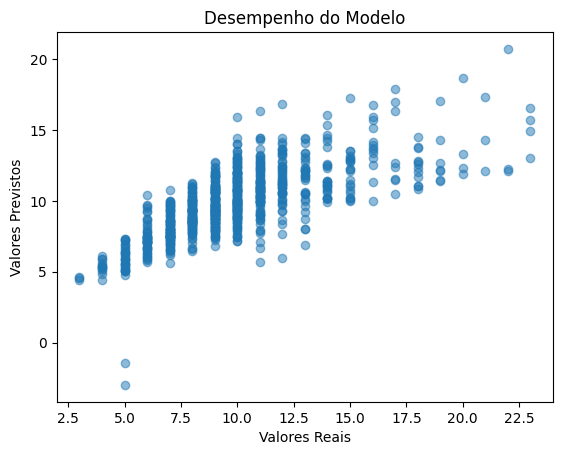

In [6]:
import matplotlib.pyplot as plt

# Gráfico de dispersão: Valores reais vs previstos
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Desempenho do Modelo")
plt.show()
